In [1]:
#this is epsilon greedy algo

In [2]:
from __future__ import print_function, division
from builtins import range
import matplotlib.pyplot as plt
import numpy as np

In [38]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0.

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
        #if np.random.random() < 1/(i+1):
            num_times_explored += 1
            j = np.random.randint(len(bandits))
            #print("explored: ", j)
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
            #print("exploited: ", j)

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()
        #print('x: ',x)

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
       
        # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

optimal j: 2
mean estimate: 0.1976401179941003
mean estimate: 0.5225988700564969
mean estimate: 0.7447082840872458
total reward earned: 7183.0
overall win rate: 0.7183
num_times_explored: 981
num_times_exploited: 9019
num times selected optimal bandit: 9307


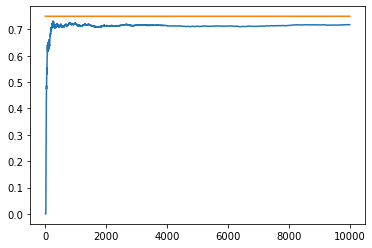

In [39]:
experiment()

In [101]:
#optimistic Inital values fill in the bank
#remeber that this tehcnique you assign a very high value to inital estimate and make the
# algo to explore more until the means drop 

NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 5. # this is where you set the estiate high
    self.N = 1. # if you don't do this the first estiamte you set in the update function will be zero

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N +=1.
    self.p_estimate = ((self.N - 1.0)*self.p_estimate + x) / self.N


def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # use optimistic initial values to select the next bandit
    # you are looking at the estimates not the true p all of them are initialized to 5 first
    j = np.argmax([b.p_estimate for b in bandits])
    #print("N: ",i, " j: ",j)
    #print("bandit j",bandits[j].p_estimate)

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()
    #print("x: ",x)

    # update rewards log
    rewards[i] = x
    #print()
    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)
    #print('bandits[j].update(x): ',bandits[j].p_estimate)

  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

mean estimate: 0.7142857142857143
mean estimate: 0.7083333333333334
mean estimate: 0.7485960689931818
total reward earned: 7472.0
overall win rate: 0.7472
num times selected each bandit: [7.0, 24.0, 9972.0]


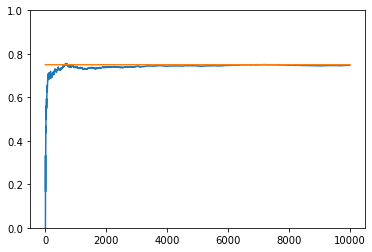

In [102]:
experiment()

In [ ]:
#UCB1 theory

In [98]:
#what is chernoff bound?
# it is the p(x>=a) <= e*-at M(t) for example you want to know the probablity of getting a large noise in communication
# what is momnet generating function?
#E[X]= integral of xpx(x)dx from -inf to inf
#what is Markov inequality?
#

2
